<a href="https://colab.research.google.com/github/JoseManuel009/03MAIR-Algoritmos-de-Optimizacion/blob/main/07MIAR_Proyecto_Programacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Trabajo Realizado por:
Sergio Gisbert Blasco

José Manuel Ballester

Marcos José Díaz Gutiérrez

Pedro Carchi Villalta

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

## Carga de datos


In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json
from google.colab import files
files.upload()  # Te permitirá subir el archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"josefifax09","key":"0544dfedac62a6be61124d519180711e"}'}

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          21959        372  1.0              
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000           1607         27  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                           18950  2025-05-07 15:41:53.213000           3930         61  1.0              
fatemehmoh

In [ ]:
#  Descargamos el dataset que nos ha tocado
!kaggle competitions download -c plant-seedlings-classification

 98% 1.65G/1.69G [00:02<00:00, 254MB/s]
100% 1.69G/1.69G [00:02<00:00, 665MB/s]


In [ ]:
# Creamos un directorio para descomprimir los datos
!mkdir my_dataset

In [51]:
# Descomprimimos los datos y los dejamos listos para trabajar
%%capture
!unzip plant-seedlings-classification.zip -d my_dataset

In [ ]:
%%capture
!ls test/

## Entrenamiento desde cero from scratch

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/my_dataset"

### Inspección del conjunto de datos

Clases:['Charlock', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet', 'Common Chickweed', 'Black-grass', 'Maize', 'Fat Hen', 'Loose Silky-bent', 'Cleavers', 'Common wheat', 'Scentless Mayweed']


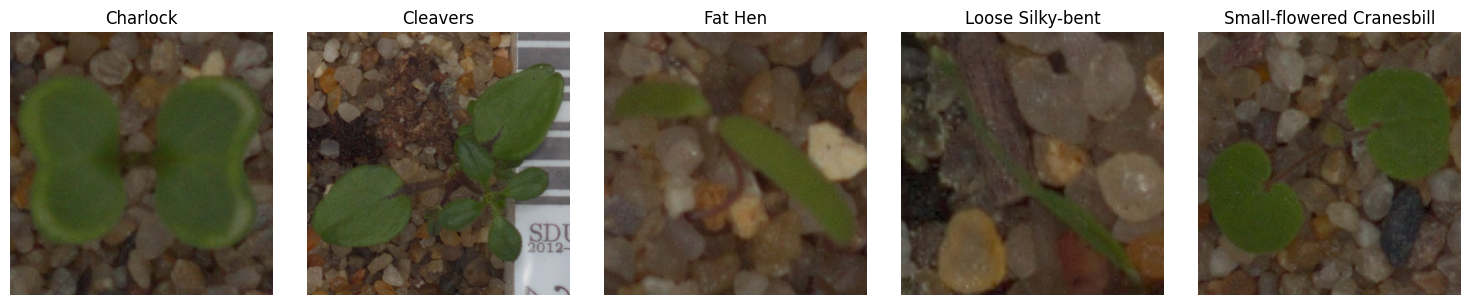

Número de imágenes por clase:
Charlock:390
Shepherds Purse:231
Small-flowered Cranesbill:496
Sugar beet:385
Common Chickweed:611
Black-grass:263
Maize:221
Fat Hen:475
Loose Silky-bent:654
Cleavers:287
Common wheat:221
Scentless Mayweed:516


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

dataset='/content/my_dataset/train'
classes = os.listdir(dataset)
print(f'Clases:{classes}')
fig, axs = plt.subplots(1,5,figsize=(15,3))

#Visualización de imagenes de ejemplo
for i,class_name in enumerate(random.sample(classes,5)):
  class_path = os.path.join(dataset,class_name)
  image_file=random.choice(os.listdir(class_path))
  image_path=os.path.join(class_path,image_file)

  image=Image.open(image_path)
  axs[i].imshow(image)
  axs[i].set_title(class_name)
  axs[i].axis('off')
plt.tight_layout()
plt.show()

#Contamos imágenes por clase
class_counts = {class_name: len(os.listdir(os.path.join(dataset,class_name))) for class_name in classes}
print("Número de imágenes por clase:")
for cls, count in class_counts.items():
  print(f'{cls}:{count}')

### Acondicionamiento del conjunto de datos

In [ ]:
import numpy as np
! pip install tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Establecemos un tamaño de imagen fijo para todo el dataset
img_size=(128,128)
images =[]
labels =[]

#Carga y preprocesado de imágenes desde carpetas por clase
for class_name in classes:
  class_path=os.path.join(dataset,class_name)
  for image_file in os.listdir(class_path):
    image_path=os.path.join(class_path,image_file)
    try:
      image=Image.open(image_path)
      image=image.convert('RGB') #Conversion a 3 canales 'rgb'
      image=image.resize(img_size)
      image=np.array(image)/255.0 #Normalizamos píxeles a [0,1]
      images.append(image)
      labels.append(class_name)
    except:
      print(f'Error al cargar la imagen: {image_path}')
images=np.array(images)
labels=np.array(labels)

#Codificamos etiquetas
le = LabelEncoder()
labels_encoded =le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

#Data Augmentation solo para las clases problematicas
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmentated_images=[]
augmentated_labels=[]
minor_classes=['Black-grass','Loose Silky-bent','Sheperd’s Purse']



#Aumentamos cada imagen 3 veces
for class_name in minor_classes:
  class_idx=[i for i,label in enumerate(labels) if label==class_name]
  x_class=images[class_idx]
  y_class=labels_categorical[class_idx]
  for img,label in zip(x_class,y_class):
    img=img.reshape((1,)+img.shape)
    aug_iter=datagen.flow(img,batch_size=1)
    for _ in range(3):
      aug_img=next(aug_iter)[0]
      augmentated_images.append(aug_img)
      augmentated_labels.append(label)

X_augmentated=np.array(augmentated_images)
y_augmentated=np.array(augmentated_labels)
#Unimos las imágenes originales con las aumentadas
X_all=np.concatenate([images,X_augmentated],axis=0)
y_all=np.concatenate([labels_categorical,y_augmentated],axis=0)

#Dividimos entre entrenamiento y validación, con un split con estratificación para mantener las proporciones de clase
X_train,X_val,y_train,y_val=train_test_split(X_all,y_all,test_size=0.2,random_state=42, stratify=y_all)
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de validación: {X_val.shape[0]}')



Tamaño del conjunto de entrenamiento: 6000
Tamaño del conjunto de validación: 1501


### Desarrollo de la arquitectura de la red neuronal y entrenamiento de la solución

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

#Calculo de pesos de clase para mitigar el desbalance
y_train_labels=np.argmax(y_train,axis=1)
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(y_train_labels),y=y_train_labels)
class_weights=dict(enumerate(class_weights))


# Creación de modelo CNN desde cero
model= Sequential([
    #Bloque 1
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    #Bloque 2
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    #Bloque 3-5
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(256,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(512,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(256,activation='relu'), #Capa densa intermedia
    Dropout(0.5), #Dropout para regularizar
    Dense(len(classes),activation='softmax') #Clasificación final usando 'softmax'
])

# Compilación del modelo
model.compile(
    optimizer=Adam(learning_rate=0.0003), #Adam con lr bajo para conseguir un entrenamiento más fino
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# EarlyStopping para detener si no mejora 'val_loss' tras 10 épocas
early_stop=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
#Guardamos el mejor modelo en el disco
checkpoint=ModelCheckpoint('best_model.keras',monitor='val_loss',save_best_only=True)
#Reduce el lr si 'val_loss' se estanca
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=1e-6,verbose=1)

# Entrenamiento con ajuste para el desbalance de clases
history=model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=50,callbacks=[early_stop,checkpoint,reduce_lr],class_weight=class_weights)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,100,172 (8.01 MB)

 Trainable params: 2,098,188 (8.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.2403 - loss: 3.1550 - val_accuracy: 0.3491 - val_loss: 4.2431 - learning_rate: 3.0000e-04
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4343 - loss: 1.5768 - val_accuracy: 0.2865 - val_loss: 5.4542 - learning_rate: 3.0000e-04
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5343 - loss: 1.2935 - val_accuracy: 0.4297 - val_loss: 2.5593 - learning_rate: 3.0000e-04
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6021 - loss: 1.0658 - val_accuracy: 0.6815 - val_loss: 0.8745 - learning_rate: 3.0000e-04
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6178 - loss: 0.9168 - val_accuracy: 0.7149 - val_loss: 0.8427 - learning_rate: 3.0000e-04
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6712 - loss: 0.7836 - val_accuracy: 0.6902 - val_loss: 1.0068 - learning_rate: 3.0000e-04
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy

### Monitorización del proceso de entrenamiento para la toma de decisiones

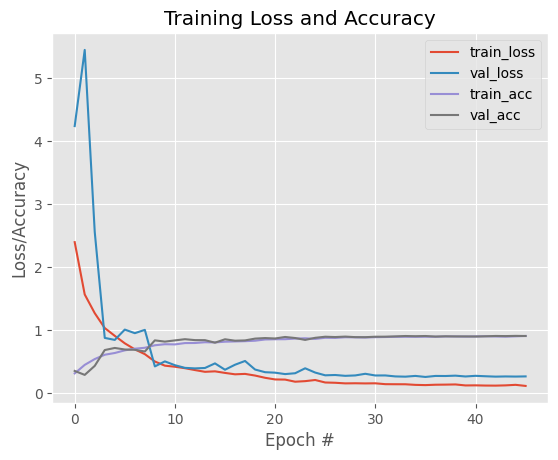

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc) + 1)


# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(loss)), loss, label="train_loss")
plt.plot(np.arange(0, len(loss)), val_loss, label="val_loss")
plt.plot(np.arange(0, len(loss)), acc, label="train_acc")
plt.plot(np.arange(0, len(loss)), val_acc, label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.rcParams['figure.figsize'] = (10, 5)
plt.legend()

plt.show()

###Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental (NO COMPLETO)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Classification Report:

                           precision    recall  f1-score   support

              Black-grass       0.75      0.72      0.74       211
                 Charlock       0.96      0.94      0.95        78
                 Cleavers       0.98      0.93      0.96        58
         Common Chickweed       0.99      0.94      0.97       122
             Common wheat       0.91      0.91      0.91        44
                  Fat Hen       0.95      0.96      0.95        95
         Loose Silky-bent       0.89      0.90      0.90       524
                    Maize       1.00      0.95      0.98        44
        Scentless Mayweed       0.94      0.98      0.96       103
          Shepherds Purse       0.93      0.87      0.90        46
Small-flowered Cranesbill       0.91      1.00      0.95        99
               Sugar beet       0.96      1.00      0.98        77

                 accuracy                           0.90      1

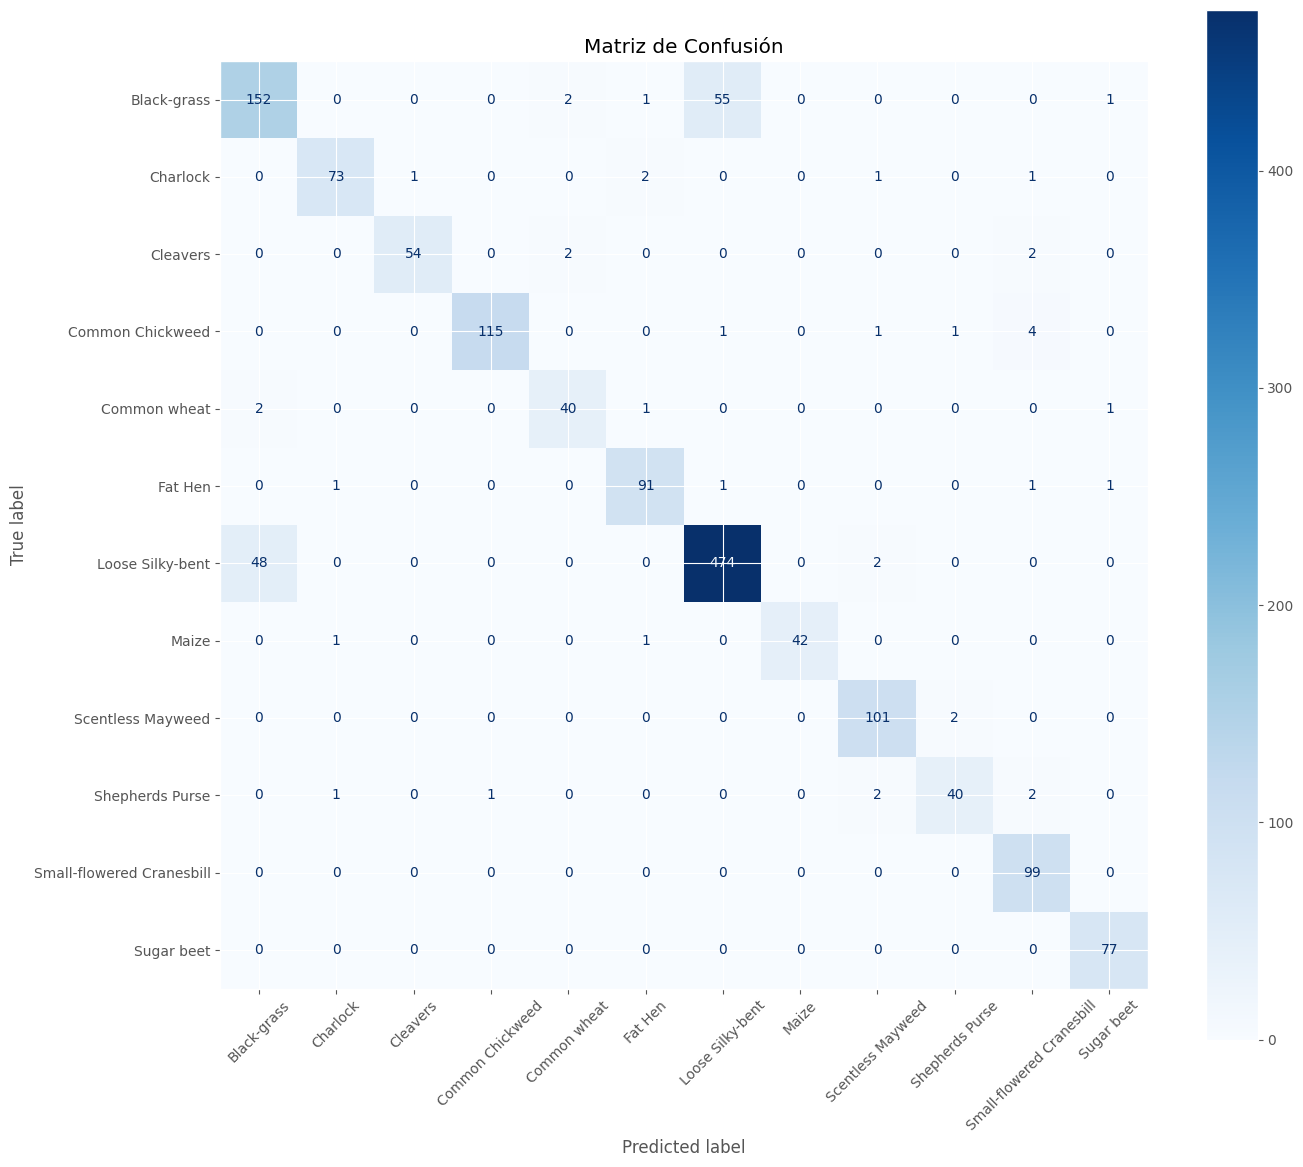

In [ ]:
Y_pred = model.predict(X_val)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(le.classes_)))

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(14,12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(le.classes_))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

---

# TRANSFER LEARNING CON RED PREENTRENADA (Ejemplo con ResNet50 y VGG16)

### 1. Preparación de los generadores de datos (Data Augmentation y Normalización)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos los paths a los datos
base_dir = "my_dataset/train"
img_height, img_width = 224, 224  # Tamaño estándar para redes preentrenadas
batch_size = 32
seed = 42

# Data Augmentation y normalización
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2 # 80% train, 20% val
)

# Generador para entrenamiento
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=seed
)

# Generador para validación
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=seed
)

num_classes = train_generator.num_classes
print(f"Número de clases: {num_classes}")


Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.
Número de clases: 12


### 2. Definición del modelo VGG16 con Transfer Learning y Regularización

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers

# Cargar VGG16 sin la parte superior, pesos de ImageNet, input shape ajustado
base_vgg = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Congelar todas las capas del modelo base
for layer in base_vgg.layers:
    layer.trainable = False

# Añadir nuevas capas superiores para clasificación
model_vgg = models.Sequential([
    base_vgg,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_vgg.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25088)          │       100,352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,241,932 (81.03 MB)

 Trainable params: 6,476,556 (24.71 MB)

 Non-trainable params: 14,765,376 (56.33 MB)

### 3. Definición del modelo ResNet50 con Transfer Learning y Regularización

In [ ]:
from tensorflow.keras.applications import ResNet50

# Cargar ResNet50 sin la parte superior, pesos de ImageNet
base_resnet = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Congelar todas las capas del modelo base
for layer in base_resnet.layers:
    layer.trainable = False

# Añadir nuevas capas superiores para clasificación
model_resnet = models.Sequential([
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model_resnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,124,556 (92.03 MB)

 Trainable params: 532,236 (2.03 MB)

 Non-trainable params: 23,592,320 (90.00 MB)

### 4. Definición del modelo EfficienNetB0 con Transfer Learning y Regularización

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Cargamos modelo
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width,3)
)



# Transfer Learning
base_model.trainable = False # No entrenamos base model

# Creamos modelo pre-entrenado
pre_trained_model = Sequential()
pre_trained_model.add(layers.Input(shape=(img_height, img_width,3)))
pre_trained_model.add(base_model)
pre_trained_model.add(layers.GlobalAveragePooling2D())

pre_trained_model.add(layers.Dense(units=12, activation='softmax'))  # capa densa de salida
pre_trained_model.summary()

# Compilacion
pre_trained_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │        15,372 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,064,943 (15.51 MB)

 Trainable params: 15,372 (60.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### 5. Entrenamiento de los modelos (VGG16, ResNet50, EfficienNetB0) con callbacks de regularización

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks: Early stopping y guardar el mejor modelo
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ModelCheckpoint('best_model_vgg.keras', save_best_only=True, monitor='val_loss')
]

# Entrenamiento del modelo VGG16
history_vgg = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=300,
    callbacks=callbacks,
    verbose=1
)

# Guardar historia para comparar luego
import pickle
with open('history_vgg.pkl', 'wb') as f:
    pickle.dump(history_vgg.history, f)


# Cambiar el nombre del checkpoint para el segundo modelo
callbacks[1] = ModelCheckpoint('best_model_resnet.keras', save_best_only=True, monitor='val_loss')


# Entrenamiento del modelo ResNet50
history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=300,
    callbacks=callbacks,
    verbose=1
)

with open('history_resnet.pkl', 'wb') as f:
    pickle.dump(history_resnet.history, f)



Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 93s 779ms/step - accuracy: 0.8142 - loss: 0.7592 - val_accuracy: 0.8321 - val_loss: 0.7783
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 89s 752ms/step - accuracy: 0.8274 - loss: 0.7649 - val_accuracy: 0.8289 - val_loss: 0.8227
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 754ms/step - accuracy: 0.8378 - loss: 0.7300 - val_accuracy: 0.8310 - val_loss: 0.8278
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 756ms/step - accuracy: 0.8240 - loss: 0.7913 - val_accuracy: 0.8215 - val_loss: 0.8502
Epoch 5/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 755ms/step - accuracy: 0.8345 - loss: 0.7767 - val_accuracy: 0.8374 - val_loss: 0.8266
Epoch 6/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 753ms/step - accuracy: 0.8476 - loss: 0.7651 - val_accuracy: 0.8427 - val_loss: 0.8565
Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 114s 854ms/step - accuracy: 0.4263 - loss: 1.8877 - val_accuracy: 0.7782 - val_loss: 0.8547
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 91s 764ms/step - accuracy: 0.7451 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle

# Entrenamiento del modelo EfficienNetB0
callbacks[1] = ModelCheckpoint('best_model_effNet.keras', save_best_only=True, monitor='val_loss')

history_effNet = pre_trained_model.fit(
  train_generator,
  validation_data = val_generator,
  epochs = 100,
  #batch_size = 32,
  callbacks = callbacks,
  verbose=1
)

with open('history_effNet.pkl', 'wb') as f:
    pickle.dump(history_effNet.history, f)

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.3098 - loss: 2.0298 - val_accuracy: 0.6822 - val_loss: 1.2196
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 759ms/step - accuracy: 0.6746 - loss: 1.1814 - val_accuracy: 0.7508 - val_loss: 0.9253
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 757ms/step - accuracy: 0.7572 - loss: 0.8757 - val_accuracy: 0.7888 - val_loss: 0.7944
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 758ms/step - accuracy: 0.7995 - loss: 0.7664 - val_accuracy: 0.8141 - val_loss: 0.6960
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 759ms/step - accuracy: 0.8332 - loss: 0.6453 - val_accuracy: 0.8321 - val_loss: 0.6320
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 759ms/step - accuracy: 0.8335 - loss: 0.6220 - val_accuracy: 0.8332 - val_loss: 0.6086
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 760ms/step - accuracy: 0.8409 - loss: 0.5561 - val_accuracy: 0.8405 - val_loss: 0.5735
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 91s 765ms/step - accuracy: 0.8543 - l

### 6. Evaluación de los modelos: Métricas, Matriz de Confusión y Curvas de Aprendizaje


30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step
Classification Report:

                           precision    recall  f1-score   support

              Black-grass       0.85      0.44      0.58        52
                 Charlock       0.96      0.99      0.97        78
                 Cleavers       1.00      0.93      0.96        57
         Common Chickweed       0.96      0.94      0.95       122
             Common wheat       0.97      0.86      0.92        44
                  Fat Hen       0.97      0.95      0.96        95
         Loose Silky-bent       0.79      0.97      0.87       130
                    Maize       0.95      0.91      0.93        44
        Scentless Mayweed       0.79      0.96      0.86       103
          Shepherds Purse       0.96      0.59      0.73        46
Small-flowered Cranesbill       0.95      0.97      0.96        99
               Sugar beet       0.96      0.97      0.97        77

                 accuracy                           0.91     

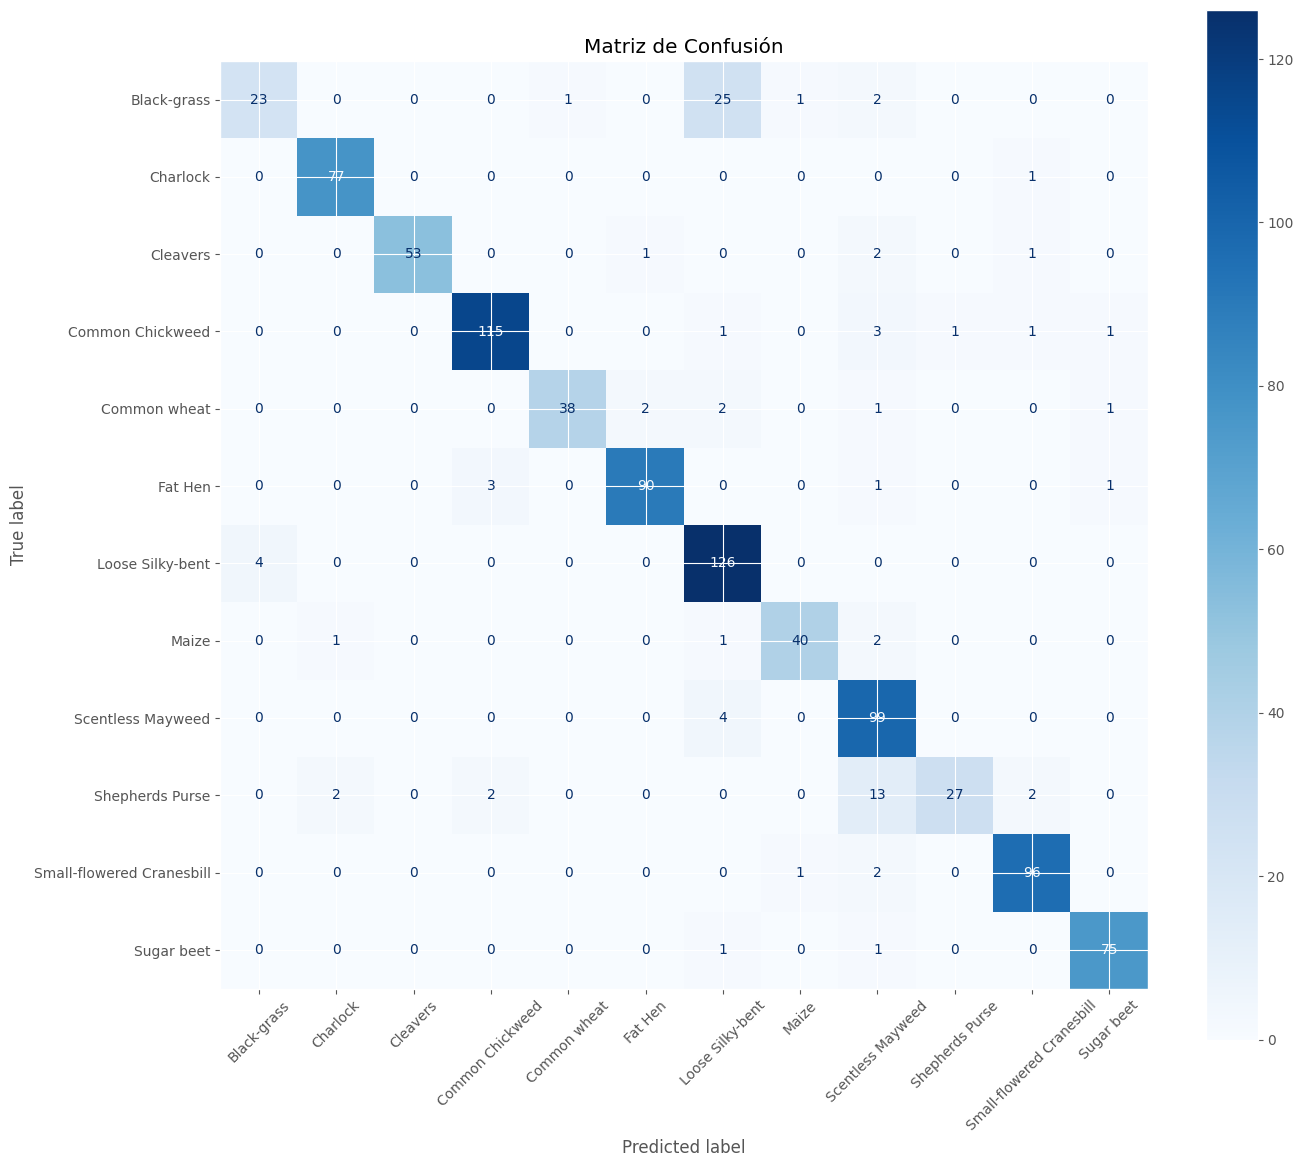

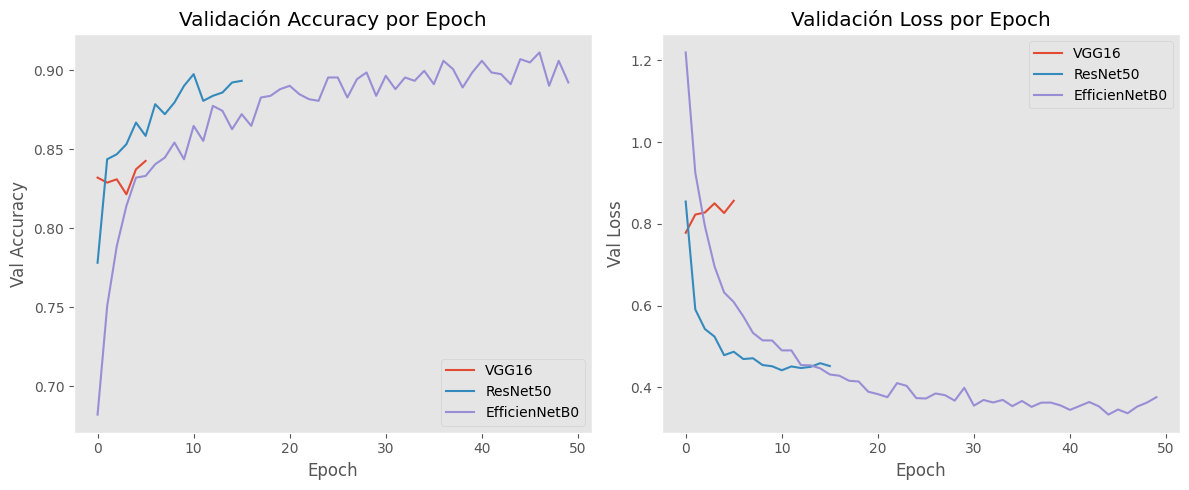

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Elegir el modelo más preciso para evaluación final
best_model = pre_trained_model
generator = val_generator

# Predicciones
generator.reset()
Y_pred = best_model.predict(generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = generator.classes

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=generator.class_indices.keys()))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(14,12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(generator.class_indices.keys()))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

# Curvas de aprendizaje
import pickle

with open('history_vgg.pkl', 'rb') as f:
    history_vgg = pickle.load(f)
with open('history_resnet.pkl', 'rb') as f:
    history_resnet = pickle.load(f)
with open('history_effNet.pkl','rb') as f:
    history_effNet=pickle.load(f)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_vgg['val_accuracy'], label='VGG16')
plt.plot(history_resnet['val_accuracy'], label='ResNet50')
plt.plot(history_effNet['val_accuracy'], label='EfficienNetB0')
plt.title("Validación Accuracy por Epoch")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history_vgg['val_loss'], label='VGG16')
plt.plot(history_resnet['val_loss'], label='ResNet50')
plt.plot(history_effNet['val_loss'], label='EfficienNetB0')
plt.title("Validación Loss por Epoch")
plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### 7. Conclusiones: Transfer Learning y Comparativa de Arquitecturas

- **El uso de transfer learning con modelos preentrenados** permite una mejora notable en la capacidad de generalización, especialmente en conjuntos de datos de tamaño medio como el utilizado en este proyecto.

- **La elección de la arquitectura es determinante**. En el análisis realizado, se observa que una arquitectura logra una convergencia más rápida y estable, alcanzando mejores resultados de precisión y pérdida en validación. Otra arquitectura, más profunda y compleja, puede requerir ajustes adicionales o un dataset mayor para mostrar todo su potencial.

- **Las gráficas de accuracy y loss** reflejan claramente la diferencia de comportamiento entre modelos: una de las arquitecturas mantiene una curva de validación ascendente y estable, mientras que la otra progresa de manera más lenta y muestra síntomas de estancamiento.

- **La matriz de confusión** evidencia que el modelo seleccionado como óptimo consigue distinguir de forma satisfactoria la mayoría de clases, aunque persisten confusiones entre categorías visualmente similares, algo habitual en problemas de clasificación de imágenes.

- **La aplicación de técnicas de regularización** como data augmentation, batch normalization y dropout resulta fundamental para evitar el sobreajuste y mejorar el rendimiento del modelo en validación.

- **Data Augmentation para la mejora de precisión del modelo**. Para mejorar el desbalanceo causado por las coincidencias entre clase vistas en la matriz de confusión, se ha creado variaciones en una de las clases para reforzar el entrenamiento.

- **En conclusión**, el enfoque de transfer learning, apoyado en una correcta selección de arquitectura y una estrategia de regularización robusta, es altamente efectivo para tareas de clasificación multiclase sobre imágenes naturales, incluso en escenarios con limitaciones en el volumen de datos etiquetados.


### Pasar a pdf

In [52]:
!apt install -y pandoc > /dev/null

name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
BASE_FOLDER = '/content/drive/MyDrive/'  # ¡Asegúrate de que esta ruta termina en '/'

# Instalar LaTeX necesario para nbconvert a PDF
!apt update > /dev/null && apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null

# Verificar que el archivo existe
!ls "{BASE_FOLDER}{name_IPYNB_file}"

# Convertir el notebook a PDF
!jupyter nbconvert --to pdf "{BASE_FOLDER}{name_IPYNB_file}" --output-dir="{BASE_FOLDER}"







W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/content/drive/MyDrive/07MIAR_Proyecto_Programacion.ipynb
[NbConvertApp] Converting notebook /content/drive/MyDrive/07MIAR_Proyecto_Programacion.ipynb to pdf
[NbConvertApp] Support files will be in 07MIAR_Proyecto_Programacion_files/
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Writing 156328 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 871268 bytes to /content/drive/MyDrive/07MIAR_Proyecto_Programacion.pdf
